In [2]:
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score

%matplotlib inline

In [3]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/383523/lesson_3_data__1_.csv' , encoding = 'windows-1251')

In [4]:
user_df = df[['tc' , 'art_sp']]

In [5]:
user_df = user_df.rename(columns= {'tc':'id_user' , 'art_sp':'brand_info'})

In [ ]:
# change a name of columns
# df = df.rename(columns=lambda c: c.upper().replace('-', '_'))

# to do split for one column. and then we take last element
# df.column_name.applay(lambda x: x.split()[-1])

In [7]:
user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])

In [8]:
user_df.head()

,id_user,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [18]:
# !!! DF
user_purchases = user_df.groupby('id_user', as_index = False).agg({'brand_name':'count'}).\
    rename(columns = {'brand_name':'purchases'}).\
query('purchases >= 5')

In [19]:
user_purchases.head()

,id_user,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [20]:
user_purchases.describe()

,id_user,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [21]:
user_purchases.head()

,id_user,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [22]:
user_purchases.shape

(3383, 2)

In [23]:
user_purchases.purchases.median()

7.0

In [15]:
# !!! DF
user_unique_brand = user_df.groupby('id_user', as_index = False).agg({'brand_name':'nunique'}).\
    rename(columns= {'brand_name':'unique_brands'})

In [16]:
user_unique_brand.head()

,id_user,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [25]:
# выводим пользователя и бранд, в котором он делает максимальное количество покупок
user_df.groupby(['id_user', 'brand_name'], as_index=False).agg({'brand_info':'count'}).\
    sort_values(['id_user' , 'brand_info'] , ascending=[False,False]).\
    groupby('id_user').head(1).\
    rename(columns= {'brand_name':'lovely_brands', 'brand_info': 'lovely_brand_purchases'})

,id_user,lovely_brands,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [30]:
# do the same by MAX()
# !!! DF 
lovely_brand_purchases_df = user_df.groupby(['id_user', 'brand_name'], as_index=False).agg({'brand_info':'count'}).\
    groupby('id_user',as_index=False).max().\
    sort_values(['id_user' , 'brand_info'] , ascending=[False,False]).\
    rename(columns= {'brand_name':'lovely_brands', 'brand_info': 'lovely_brand_purchases'})

In [37]:
# Merge
loyalty_df = user_purchases.merge(user_unique_brand, how='inner', on = 'id_user').\
    merge(lovely_brand_purchases_df, how = 'inner', on = 'id_user')


In [38]:
loyalty_df.head()

,id_user,purchases,unique_brands,lovely_brands,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Store_Brand,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Store_Brand,19
4,45181,5,4,Store_Brand,2


In [39]:
loyalty_df[loyalty_df.unique_brands == 1]

,id_user,purchases,unique_brands,lovely_brands,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [40]:
loyalty_df['loyalty_score'] = loyalty_df['lovely_brand_purchases'] / loyalty_df['purchases']

In [41]:
loyalty_df.head()

,id_user,purchases,unique_brands,lovely_brands,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Store_Brand,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Store_Brand,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


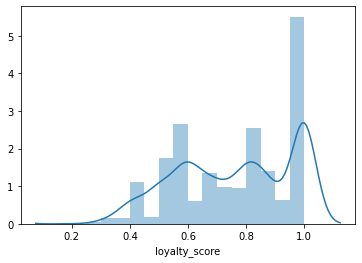

In [44]:
ax = sns.distplot(loyalty_df.loyalty_score)

In [46]:
loyalty_df.loyalty_score.median()

0.8

In [50]:
brand_loyalty = loyalty_df.groupby('lovely_brands', as_index = False).agg({'loyalty_score':'median', 'id_user':'count' })

In [52]:
brand_loyalty 

,lovely_brands,loyalty_score,id_user
0,Brand_1,1.000000,72
1,Brand_2,1.000000,21
2,Brand_3,0.645833,16
3,Brand_4,1.000000,1297
4,Brand_5,0.611111,23
5,Brand_7,0.666667,72
6,Store_Brand,0.666667,1882


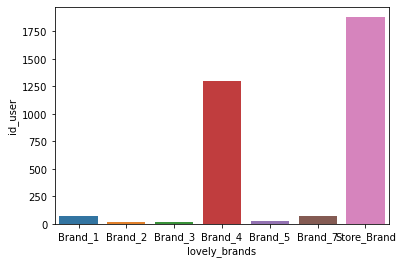

In [51]:
ax = sns.barplot(x = 'lovely_brands' , y = 'id_user' , data = brand_loyalty)